In [73]:
import numpy as np
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt

In [7]:
path = '/home/david/Documents/MA/testbench/'
curiouspath = os.path.join(path, 'objdump/')
aflpath = os.path.join(path, 'objdump-afl')


In [27]:
curiousdf['date'][0]

Timestamp('2019-08-25 09:58:17')

In [44]:
curiousdf = pd.read_csv(curiouspath+'/afl_out/plot_data')
curiousdf['date'] = pd.to_datetime(curiousdf['# unix_time'],unit='s')
curiousdf['delta_time'] = curiousdf['date']-curiousdf['date'][0]
dfcur = curiousdf.set_index('delta_time').resample('0.1T').mean().dropna().reset_index()
dfcur = dfcur[['delta_time', ' paths_total']]
dfcur = dfcur.rename(columns={' paths_total': 'cur_path'})

In [45]:
curiousdf = pd.read_csv(aflpath+'/afl_out/plot_data')
curiousdf['date'] = pd.to_datetime(curiousdf['# unix_time'],unit='s')
curiousdf['delta_time'] = curiousdf['date']-curiousdf['date'][0]
curiousdf.set_index('delta_time').resample('0.1T').mean().dropna().reset_index()
dfafl = curiousdf.set_index('delta_time').resample('0.1T').mean().dropna().reset_index()
dfafl = dfafl[['delta_time', ' paths_total']]
dfafl = dfafl.rename(columns={' paths_total': 'afl_path'})

In [59]:
df = dfcur.merge(dfafl, on='delta_time')

In [61]:
df['delta_time'] = df['delta_time'].dt.total_seconds()

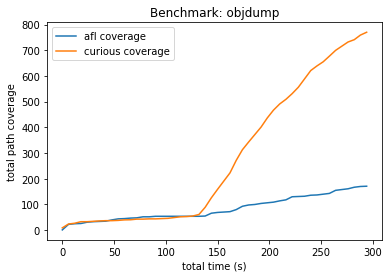

In [101]:
ax = sb.lineplot(x="delta_time", y="afl_path", data=df, label="afl coverage")
sb.lineplot(x="delta_time", y="cur_path", data=df, label="curious coverage")

ax.set(xlabel='total time (s)', ylabel='total path coverage')

plt.legend()
plt.title('Benchmark: objdump')
plt.savefig('./objdump.png', dpi = 200)

In [93]:
X

<Figure size 432x288 with 0 Axes>

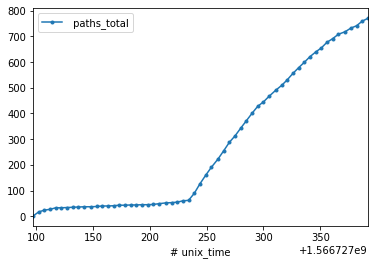

In [22]:
curiousdf.plot(x='# unix_time', y=' paths_total', marker='.')